# Team 10 -- Structure Analysis -- FAT (Features from Algebraic Topology)

_Shaun Harker_, _Assistant Research Professor, Mathematics Department, Rutgers University_.

# Goals 

The goal of the structures subproject for Team 9/10 is to create novel features measuring protein structure. The **FAT** approach is to create **F**eatures based on **A**lgebraic **T**opology. Once such features are designed, statistical methods can be used to determine if they are useful in explaining variance between predictions and experimental data regarding the stability of protein designs and protein-protein interfacing.

Specifically, this subproject had the following goals:

* __Develop__ a tool to compute persistence diagrams for PDB data
* __Deploy__ the tool to both an HPC environment and Jupyter notebooks
* __Compute__ persistence diagrams for the data under investigation in the TACC Maverick system provided by organizers
* __Analyze__ the computed persistence diagrams and determine if they provide a useful feature for stability/binding prediction

# Outcomes 

The following outcomes were realized:

* __Software__ for the analysis of protein structure data
* __Computational results__ consisting of topological characterizations of over +10K protein structures
* __Plans__ for follow up work and collaborations with fellow event participants
* __Training__: interaction with varied experts with knowledge of experimental biology, machine learning, high performance computing, and computational chemistry led to a much improved understanding of the current state of the art data analyses, experimental techniques, and computational methodologies.  


## Development

Software was written in C++ (for speed), given Python bindings (for usability), and deployed on Github (for availability):

<https://github.com/shaunharker/SD2E-Hackathon-Team10-ProteinPersistence>



## Deployment

The software was tested in three environments:
    
    * Local Jupyter Notebook
    * TACC Jupyter Notebook
    * TACC Maverick HPC cluster

Testing was successful for the local Jupyter Notebook environment and on the TACC Maverick HPC cluster. Testing was not successful TACC Jupyter Notebook since the container it is based on would require a large software stack to be installed manually (without a package manager) and without the assistance of module systems.


## Computation

### HPC Computation

* Analyzed 13180 docked protein configurations (4.3GB of PDB data)
* Produced 5.8GB of persistence diagram data.
* Computations took approximately 1 second per configuration.
* Using 20 cores on TACC Maverick, the computation took under 15 minutes (!). 

### Example Computation

We provide an interface to persistent homology via a one line command:

```
diagrams = Compute_PDB_PersistenceDiagrams('example.pdb')
```

Some of the code below can be integrated into the package so it does not need to appear in a Jupyter notebook; for present purposes it is more instructive to include it to explain the pipeline:

0. Set up python environment
1. Loads PDB file with BioPython package
2. Create list of (x,y,z,r) tuples giving atomic centers and van der Waals radii 
3. Calls the _ProteinPersistence_ package, which uses CGAL to create a weighted alpha complex (with weights given by van der Waals radii), and PHAT to compute persistence diagrams. 
4. Display results

In [1]:
# Set up environment
%matplotlib inline
import matplotlib.pyplot as plt
from Bio.PDB import *
import re
import ProteinPersistence

In [2]:
# Load PDB structure and assign van der Waals radii to atoms
def Compute_PDB_PersistenceDiagrams(filename):
    # Load an example PDB file using BioPython
    p = PDBParser()
    structure = p.get_structure('',filename)
    # Create a list of entries [x, y, z, r] representing (x,y,z) coordinates of each atom
    # and van der Waals radius of that atom
    def atom_shortname(s):
        return s[re.search("[A-Z]", s).start()]

    def vanderWaalsRadius(atom_name):
        """ 
        Return van der Waals radius associated with 'atom_name'
        """
        return { "H" : 1.2, "C" : 1.7 , "N" : 1.55, "O" : 1.52, "S" : 1.8}[atom_name];
    xyzr_list = [ list(atom.get_coord()) + [vanderWaalsRadius(atom_shortname(atom.get_name()))] \
                  for atom in structure.get_atoms() ]
    # Compute 
    return ProteinPersistence.pdb2persistence(xyzr_list)

In [3]:
# Code for displaying persistence diagrams
def DisplayDiagrams(diagrams):
    fig = plt.figure(figsize=(20, 6))
    for d in [0,1,2]:
        x_vals = [ item[0] for item in diagrams[d]]
        y_vals = [ item[1] for item in diagrams[d]]
        ax = fig.add_subplot(1, 3, d+1)
        plt.scatter(x_vals, y_vals)

In [4]:
# Compute Persistence Diagrams via CGAL and PHAT
diagrams = Compute_PDB_PersistenceDiagrams('example.pdb')

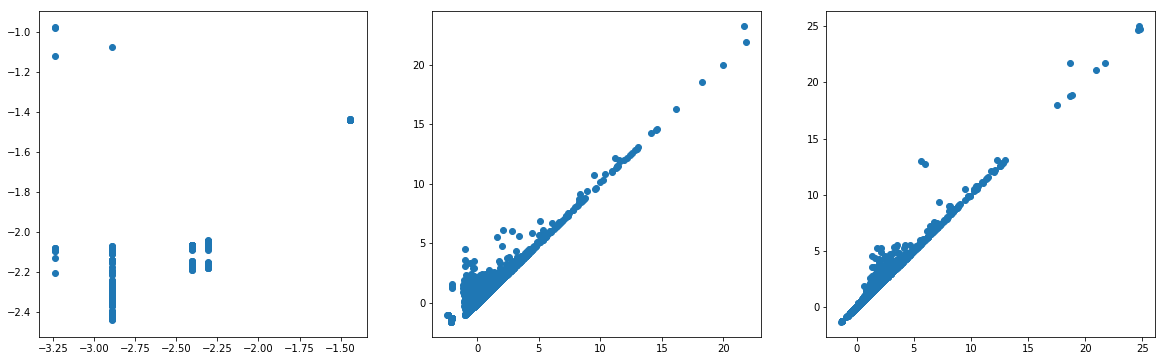

In [5]:
# Display persistence diagrams computed from PDB file. 
DisplayDiagrams(diagrams)

# Analysis

* The original goal was to produce numeric feature columns based on the output of persistence that could be used in a statistical approach (e.g. the `BayesDB` approach pursued by Team 10).
* However, inspection of the results revealed that persistent diagrams contain a significant amount of topological data.
* In order to use this in a statistical approach this entails further analysis to reduce the dimensionality of the persistent homology diagrams.
* Two viable approaches which may be attempted in follow up work are
  * The _Stable Vector Representation_ approach of  
  > Adams, Henry, et al. "Persistence images: a stable vector representation of persistent homology." Journal of Machine Learning Research 18.8 (2017): 1-35.
  * The _Diffusion Coordinates_ approach of
  > Coifman, Ronald R., et al. "Geometric diffusions as a tool for harmonic analysis and structure definition of data: Diffusion maps." Proceedings of the National Academy of Sciences of the United States of America 102.21 (2005): 7426-7431.


# Planned Collaborations and Follow-up Work

* Further data characterizing protein structure of the form of electron density fields is possible to compute via _Density Functional Theory_. This data provides an alternative approach to construct topological complexes characterizing structure which may be more useful than ball-and-stick model derived topological characterizations. Joshua Schrier (Haverford) is an expert at computing such electron density fields and can provide voxel data corresponding to PDB files. This allows for several follow-up projects:
  * Compare persistence diagrams computed based on weighted alpha-shape (ball-and-stick with van der Waals radius) approach with persistence diagrams of filtrations of cubical complex based on superlevel sets of electron density voxel data.
  * Apply Stable Vector Representation and Diffusion Coordinates to persistence diagrams from electron density data (i.e. replicate analysis proposed above for this data as well)  
* Stability and binding affinity may not be equally sensitive to topological features irrespective of their spatial position.
  * For binding affinity it seems reasonable to expect that topological features on or near the predicted interface are more predictive.
  * Persistent homology hides some information that may be available in a analysis called _Connection Matrices_, which can give information information about how topological features are spatially interrelated. In particular, algorithms capable of efficiently computing connection matrices and providing geometric information about the topological features discovered and their connections has recently been developed in the cubical case. This could be applied to electron density voxel data. 

